In [9]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

def word_analyze(bookStr, title):
    # simple lowercase tokenize
    tokens = nltk.word_tokenize(bookStr.lower())

    # filter out tokens that aren't words
    wordTokensLowerCase = [word for word in tokens if word[0].isalpha()]

    # determine frequencies
    wordTokensLowerCaseFreqs = nltk.FreqDist(wordTokensLowerCase)
    word_cloud(wordTokensLowerCaseFreqs)

    # preview the top 20 frequencies
    wordTokensLowerCaseFreqs.tabulate(15)

    # plot the top frequency words in a graph
    plt.figure()
    wordTokensLowerCaseFreqs.plot(15, title="Top Frequency Words in " + title)

    wordTokenLengths = [len(w) for w in wordTokensLowerCase]

    wordTokenLengthFreqs = list(sorted(nltk.FreqDist(wordTokenLengths).items()))

    wordTokenWordLengths = [f[0] for f in wordTokenLengthFreqs]
    wordTokenWordLengthValues = [f[1] for f in wordTokenLengthFreqs]
    plt.figure()
    plt.plot(wordTokenWordLengths, wordTokenWordLengthValues)
    plt.title("Word Length Frequencies in " + title)
    plt.xlabel('Word Length')
    plt.ylabel('Word Count')

    plt.figure()
    stopwords = nltk.corpus.stopwords.words("English")
    stopwords.append("like")
    contentWordTokensLowercase = [word for word in wordTokensLowerCase if word not in stopwords+ ["â"]]
    contentWordTokensLowercaseFreqs = nltk.FreqDist(contentWordTokensLowercase)
    contentWordTokensLowercaseFreqs.tabulate(15)
    contentWordTokensLowercaseFreqs.plot(15, title="Top Frequency Content Terms in " + title )
    
    word_cloud(contentWordTokensLowercaseFreqs)
    
    theText = nltk.Text(tokens)
    theText.concordance("son", lines=15)


In [7]:
def word_cloud(bookStr):
    # lower max_font_size
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(max_font_size=40, background_color="white", stopwords=stopwords).generate_from_frequencies(bookStr)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

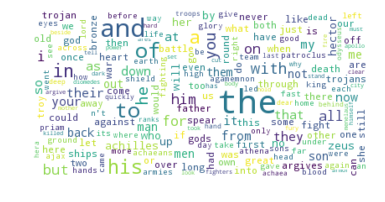

  the   and    of    to   his    in     a    he   you  with    on   all     i   but   him 
10569  5510  3542  3525  2959  2588  2515  1903  1860  1669  1384  1377  1337  1270  1217 


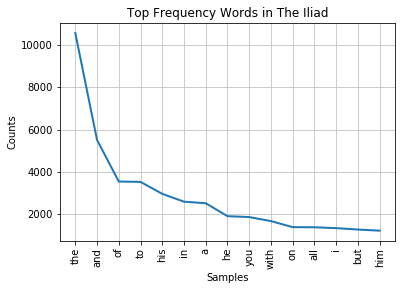

     son      men     back      man   hector     zeus achilles  trojans      god    ships      one    never     gods    heart   battle 
     691      672      646      641      551      549      525      402      401      398      389      375      332      320      303 


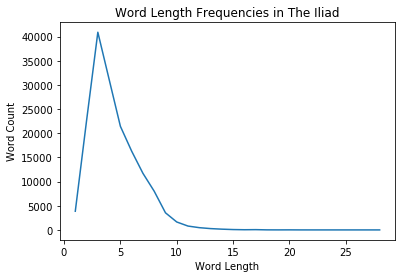

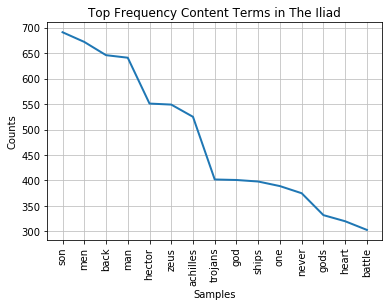

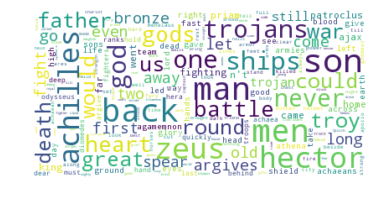

No matches


In [8]:
import io

fullBookStr = ""
# read The books plain text into string
for i in range(1, 25):
    with io.open("data/"+ str(i), "r",encoding='utf8') as f:
        bookStr = f.read()
    fullBookStr += u"{}".format( bookStr)
    #word_analyze(bookStr, "Book " + str(i))
    #word_cloud(bookStr)
    
word_analyze(fullBookStr, "The Iliad")
#word_cloud(fullBookStr)